In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv(r"fifa_players.csv")
df.head()

,wage_eur,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,b'Argentina',93.0,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,b'Poland',92.0,92.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,b'Portugal',91.0,91.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,b'Brazil',91.0,91.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,b'Belgium',91.0,91.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


In [3]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace(" ","_")
df.head()

,wage_eur,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,b'argentina',93.0,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,b'poland',92.0,92.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,b'portugal',91.0,91.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,b'brazil',91.0,91.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,b'belgium',91.0,91.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19178 entries, 0 to 19177
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19178 non-null  float64
 1   age                         19178 non-null  float64
 2   height_cm                   19178 non-null  float64
 3   weight_kg                   19178 non-null  float64
 4   nationality_name            19178 non-null  object 
 5   overall                     19178 non-null  float64
 6   potential                   19178 non-null  float64
 7   attacking_crossing          19178 non-null  float64
 8   attacking_finishing         19178 non-null  float64
 9   attacking_heading_accuracy  19178 non-null  float64
 10  attacking_short_passing     19178 non-null  float64
 11  attacking_volleys           19178 non-null  float64
 12  skill_dribbling             19178 non-null  float64
 13  skill_curve                 191

In [5]:
df["nationality_name"].nunique()


163

C:\Users\HASSNA\AppData\Local\Temp\ipykernel_13256\2611970710.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

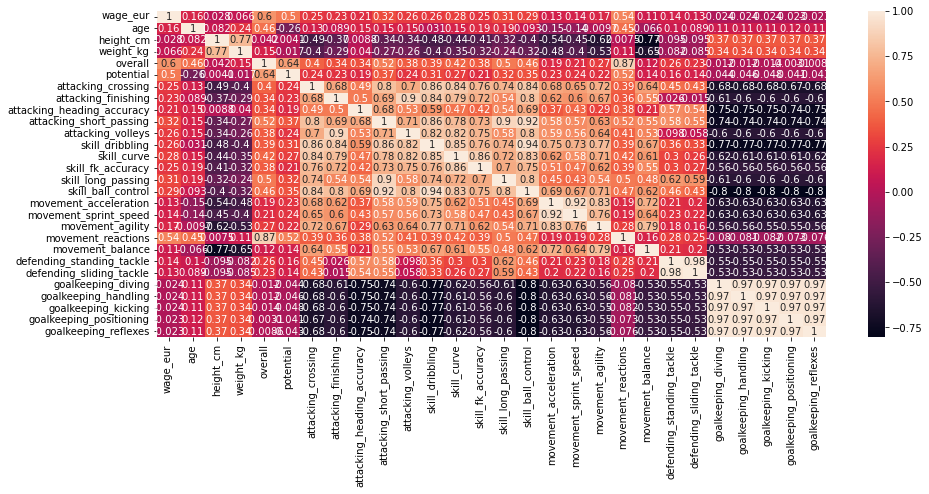

In [6]:
plt.figure(figsize=((15,6)))
sns.heatmap(df.corr(),annot=True)

In [7]:
df=df[[ "wage_eur" , "movement_reactions" , "skill_ball_control" , "skill_long_passing" , "skill_fk_accuracy" , "skill_curve" , "skill_dribbling"  , "attacking_volleys" ,"attacking_short_passing", "attacking_crossing" , "potential" , "overall" ] ]

<AxesSubplot: >

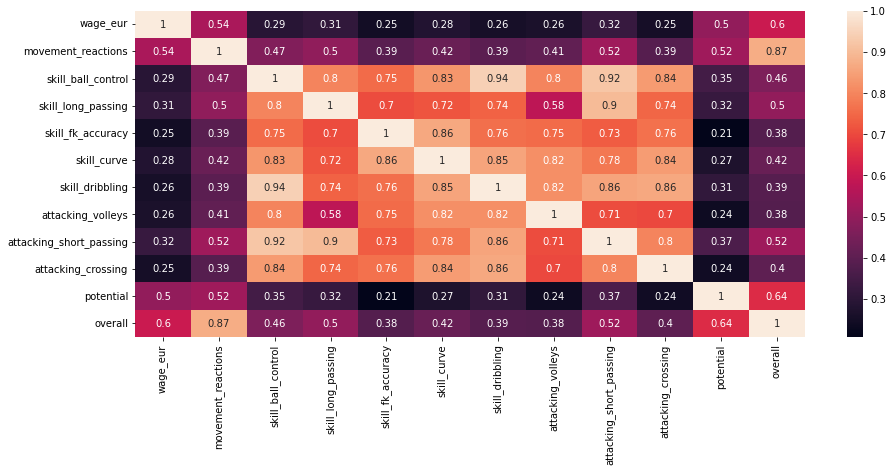

In [8]:
plt.figure(figsize=((15,6)))
sns.heatmap(df.corr(),annot=True)

In [9]:
df =df.drop(["movement_reactions" , "attacking_crossing" , "skill_ball_control"] , axis=1)


In [10]:
df =df.drop(["skill_long_passing" , "skill_fk_accuracy" , "skill_dribbling"] , axis=1)


<AxesSubplot: >

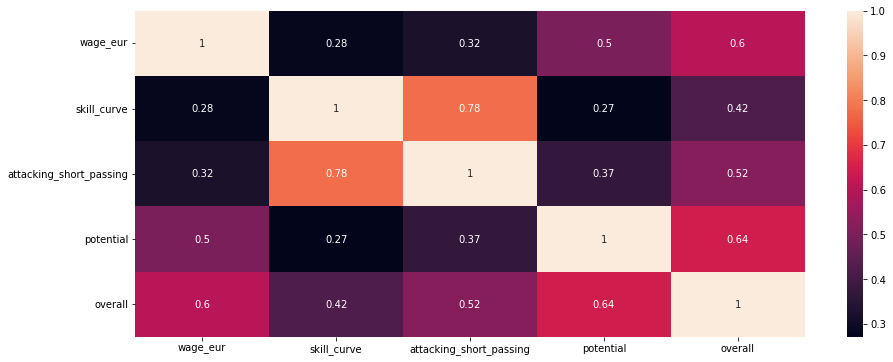

In [11]:
df =df.drop(["attacking_volleys" ] , axis=1)
plt.figure(figsize=((15,6)))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.describe()

,wage_eur,skill_curve,attacking_short_passing,potential,overall
count,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000
mean,9017.989363,47.263427,58.860726,71.076442,65.760246
std,19470.176724,18.178630,14.488838,6.089398,6.882432
min,500.000000,6.000000,7.000000,49.000000,47.000000
25%,1000.000000,35.000000,54.000000,67.000000,61.000000
50%,3000.000000,49.000000,62.000000,71.000000,66.000000
75%,8000.000000,61.000000,68.000000,75.000000,70.000000
max,350000.000000,94.000000,94.000000,95.000000,93.000000


<AxesSubplot: ylabel='wage_eur'>

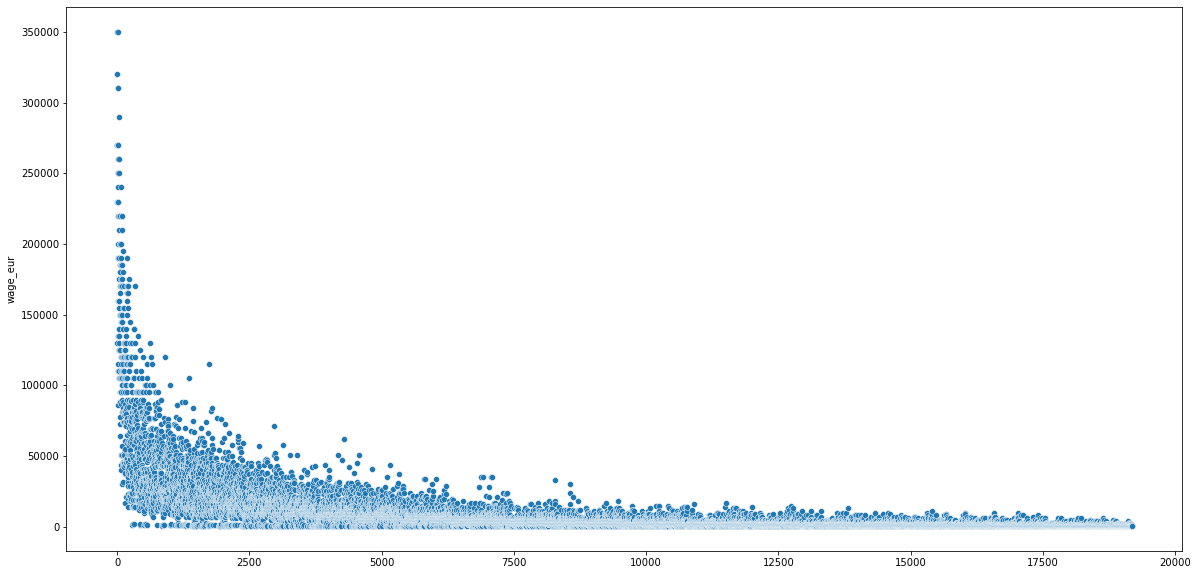

In [13]:
plt.figure(figsize=((20,10)))
sns.scatterplot(df["wage_eur"])

In [14]:
df=df[df["wage_eur"]<=300000]

<AxesSubplot: ylabel='wage_eur'>

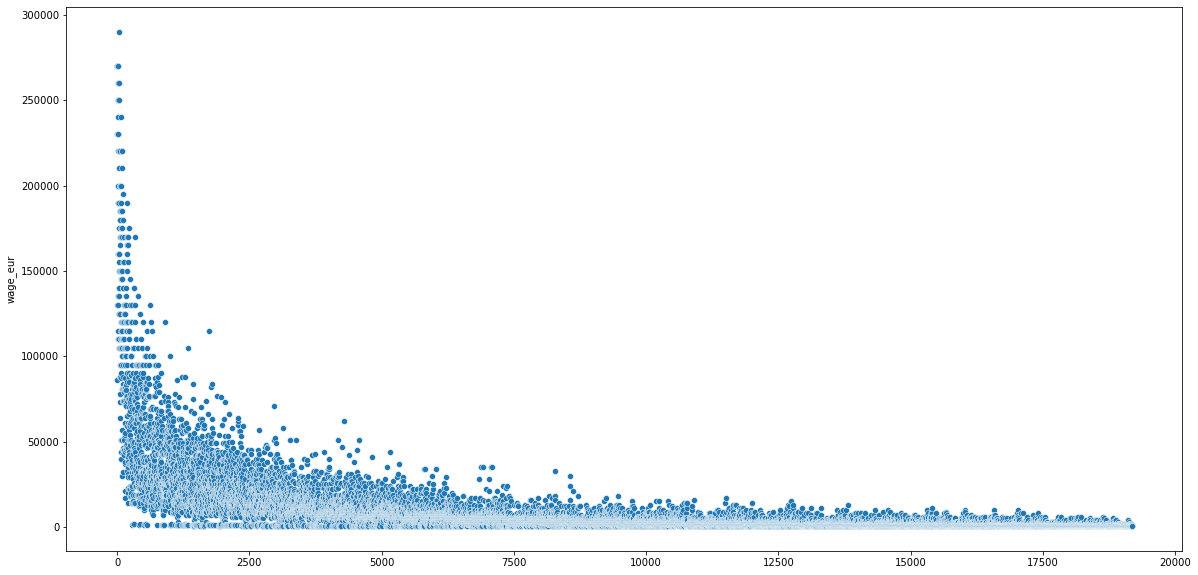

In [15]:
plt.figure(figsize=((20,10)))
sns.scatterplot(df["wage_eur"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19173 entries, 1 to 19177
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wage_eur                 19173 non-null  float64
 1   skill_curve              19173 non-null  float64
 2   attacking_short_passing  19173 non-null  float64
 3   potential                19173 non-null  float64
 4   overall                  19173 non-null  float64
dtypes: float64(5)
memory usage: 898.7 KB


<AxesSubplot: xlabel='overall', ylabel='wage_eur'>

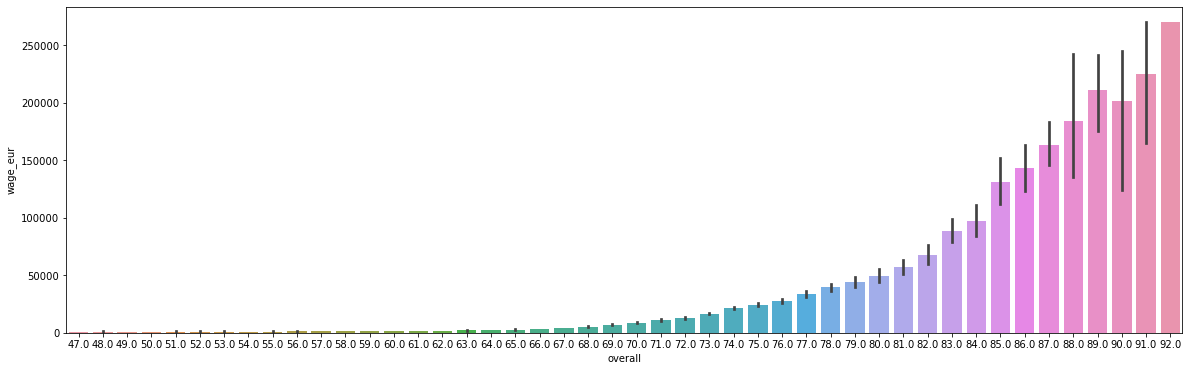

In [17]:
plt.figure(figsize=((20,6)))
sns.barplot(x=df["overall"],y=df["wage_eur"])

<AxesSubplot: xlabel='potential', ylabel='wage_eur'>

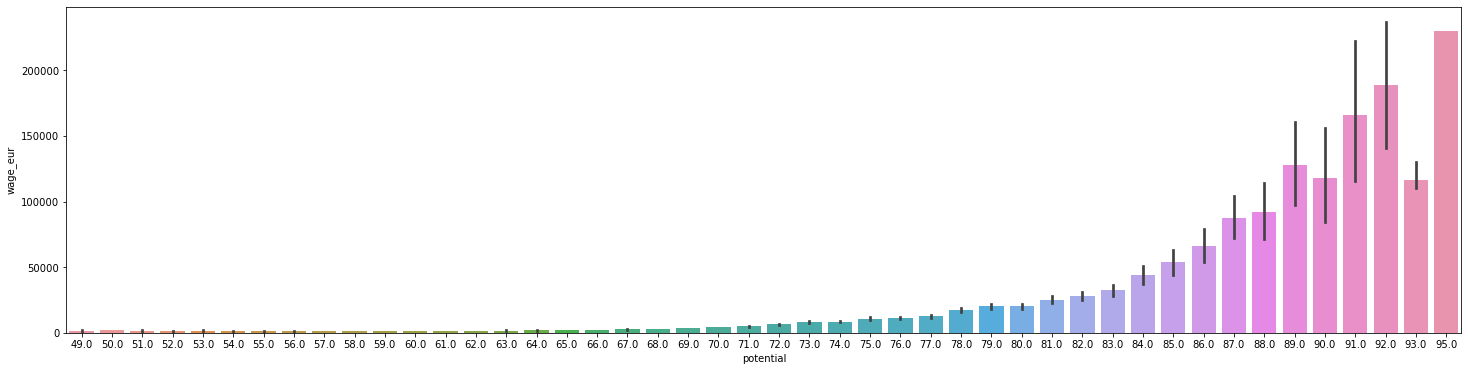

In [18]:
plt.figure(figsize=((25,6)))
sns.barplot(x=df["potential"],y=df["wage_eur"])

<AxesSubplot: xlabel='potential', ylabel='wage_eur'>

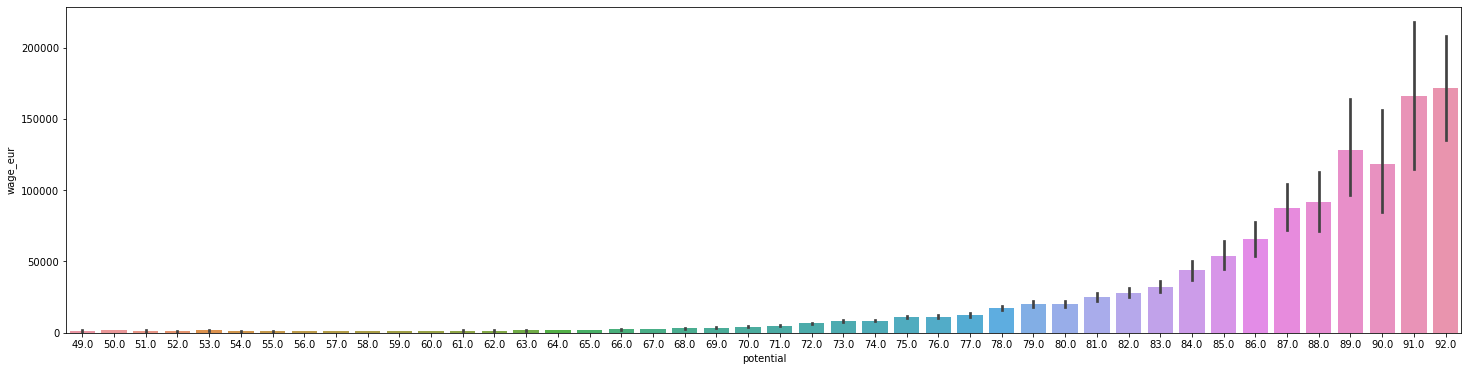

In [19]:
df["potential"] = np.where(df["potential"]>92,92,df["potential"])
plt.figure(figsize=((25,6)))
sns.barplot(x=df["potential"],y=df["wage_eur"])

<AxesSubplot: xlabel='attacking_short_passing', ylabel='wage_eur'>

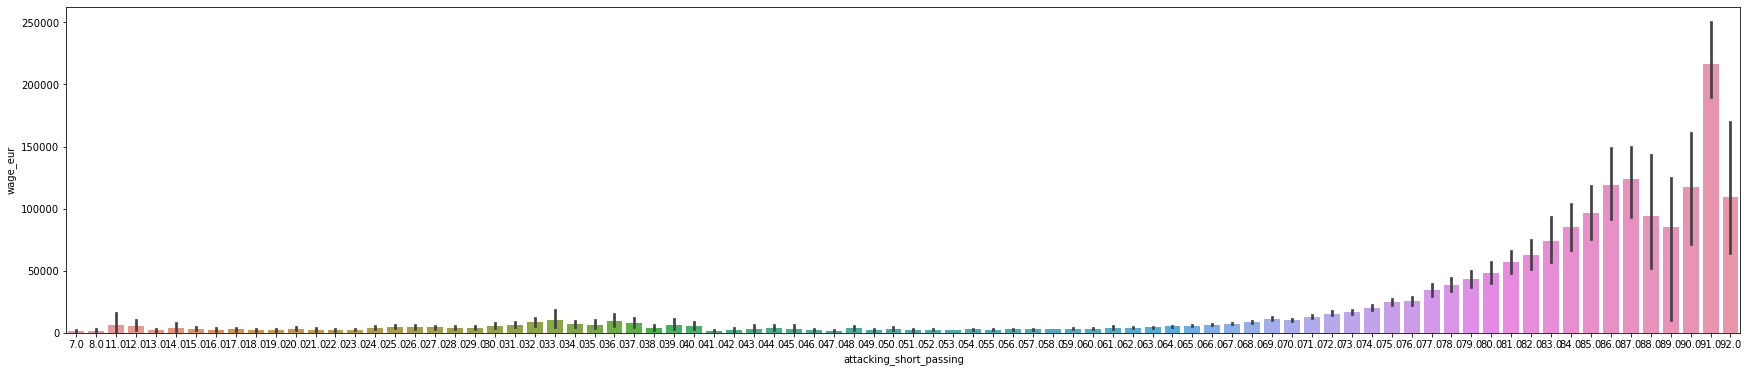

In [20]:
plt.figure(figsize=((30,6)))
sns.barplot(x=df["attacking_short_passing"],y=df["wage_eur"])

<AxesSubplot: xlabel='attacking_short_passing', ylabel='wage_eur'>

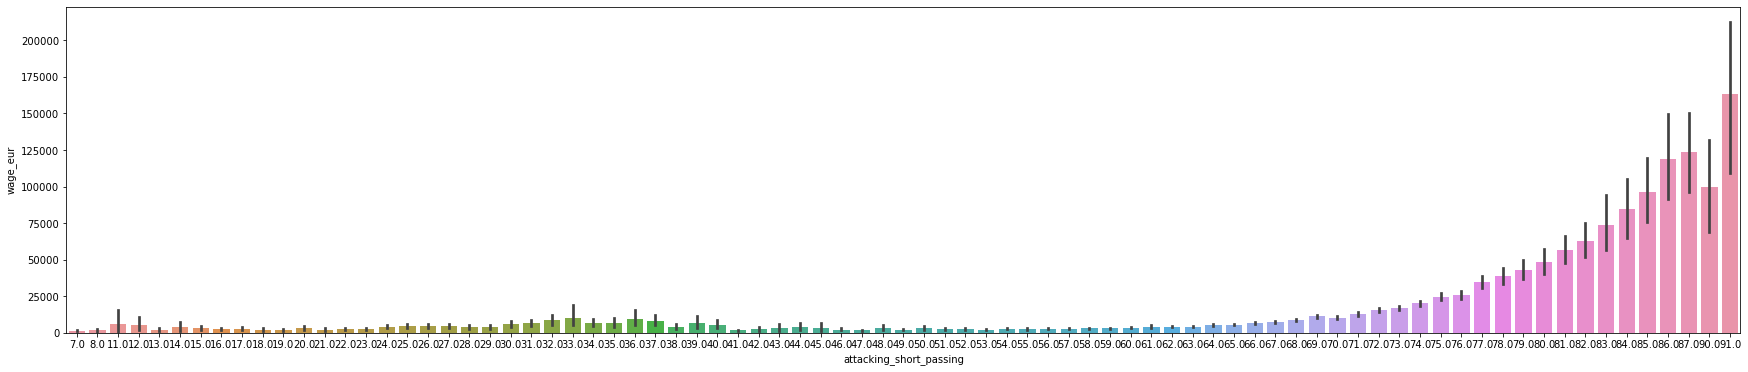

In [21]:
#df=df[df["attacking_short_passing"]!=92]
df["attacking_short_passing"] = np.where(df["attacking_short_passing"]>91,91,df["attacking_short_passing"])
df["attacking_short_passing"] = np.where(df["attacking_short_passing"]==89,90,df["attacking_short_passing"])
df["attacking_short_passing"] = np.where(df["attacking_short_passing"]==88,90,df["attacking_short_passing"])
plt.figure(figsize=((30,6)))
sns.barplot(x=df["attacking_short_passing"],y=df["wage_eur"])

<AxesSubplot: xlabel='skill_curve', ylabel='wage_eur'>

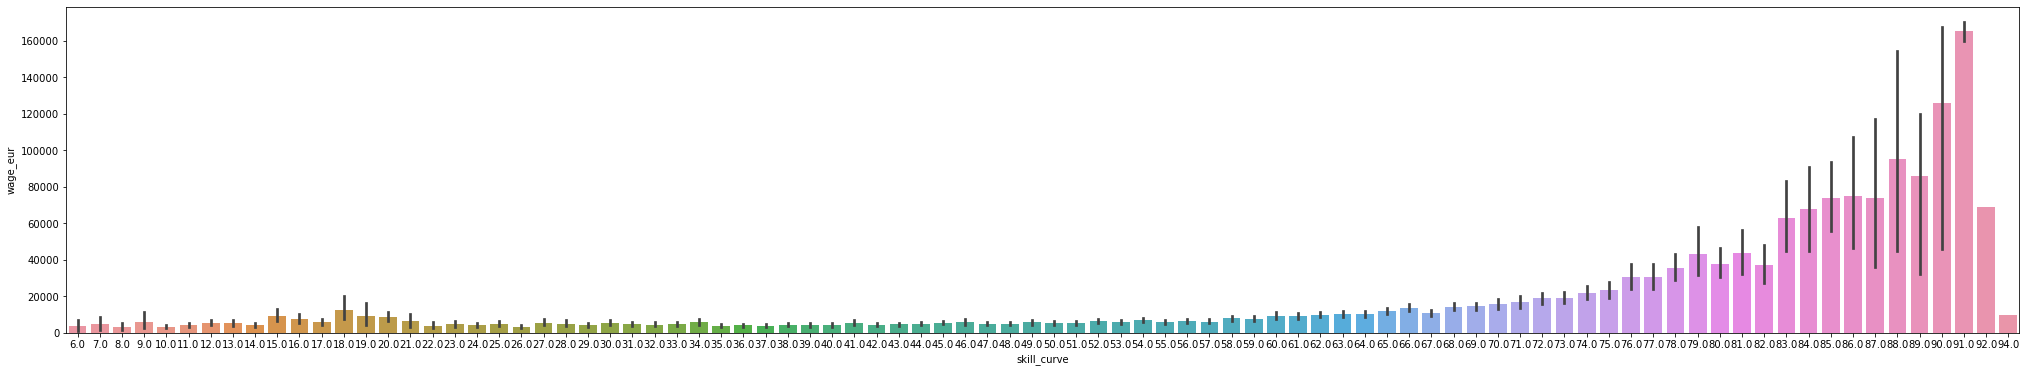

In [22]:
plt.figure(figsize=((35,6)))
sns.barplot(x=df["skill_curve"],y=df["wage_eur"])

<AxesSubplot: xlabel='skill_curve', ylabel='wage_eur'>

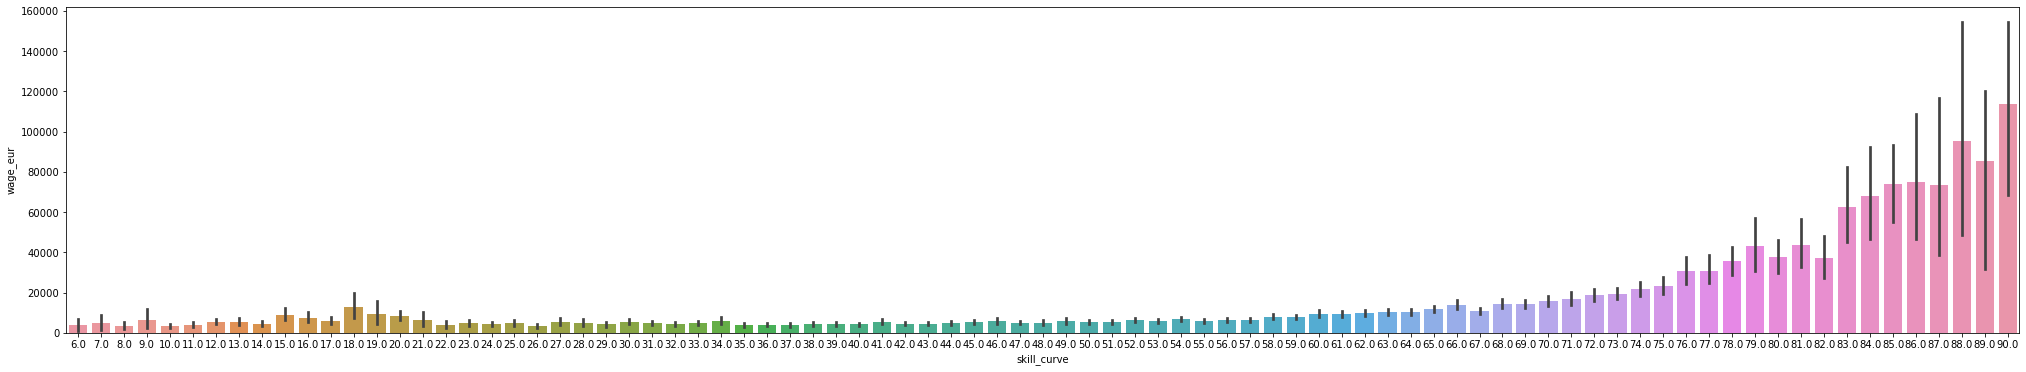

In [23]:
df["skill_curve"] = np.where(df["skill_curve"]>90,90,df["skill_curve"])
plt.figure(figsize=((35,6)))
sns.barplot(x=df["skill_curve"],y=df["wage_eur"])

In [24]:
x=df.drop(["wage_eur"] , axis=1)
y=df["wage_eur"]
x_train, x_test , y_train , y_test =train_test_split(x , y , test_size=0.2 , random_state=42)
model=LinearRegression()
model.fit(x_train , y_train)
model.score(x_train , y_train)

0.3902310815546395

In [25]:
model.score(x_test,y_test)

0.4062911585090291

In [26]:
poly=PolynomialFeatures(degree=2 , include_bias=False)
new_x=poly.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.6677644646974816

In [28]:
model.score(x_train,y_train)

0.6677644646974816

In [29]:
model.score(x_test,y_test)

0.7015184223107265